# **Supervised Machine Learning Ensemble Techniques**

**Naive Bayes - Breast_Cancer Dataset**

In [ ]:
#Importing necessary libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
import pandas as pd

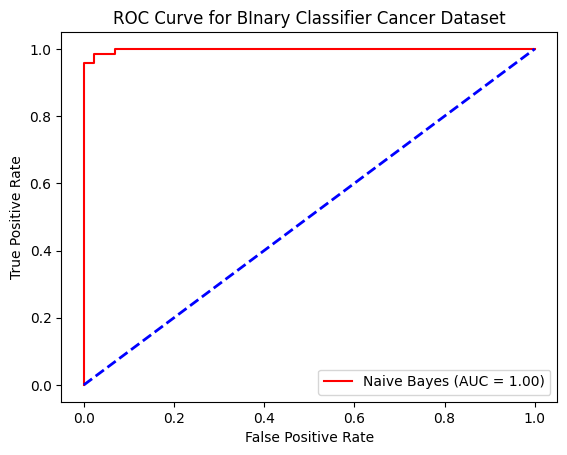

In [ ]:
#Loading the cancer dataset from sklearn.datasets.
cancer = load_breast_cancer()

#Training, test dataset for dependent and independent variables.
x_trg, x_test, y_trg, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

#Developing a naive Bayes model fro training dataset.
naivecancer = GaussianNB()
naivecancer.fit(x_trg, y_trg)

#Predicting probabilities for test dataset of independent varibles.
cancer_probs = naivecancer.predict_proba(x_test)

#Considering probabilitirs for the positive outcome only.
cancer_probs = cancer_probs[:,1]

#Calculate ROC scores from original data and predicted probabilities.
cancer_auc = roc_auc_score(y_test, cancer_probs)

#Determine false positive and true positive rate from ROC curve.
cancer_fpr, cancer_tpr, _ = roc_curve(y_test, cancer_probs)

#Plot the ROC curve for the model.
plt.plot(cancer_fpr, cancer_tpr, color="red", label=f'Naive Bayes (AUC = {cancer_auc:.2f})')

#Plot the straight line for the model.
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

#Defining the axis labels and title.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BInary Classifier Cancer Dataset')
plt.legend(loc='lower right')

#Display the plot.
plt.show()

**SVM Classifier - Iris Dataset**

In [ ]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


In [ ]:
#Loading and reading data.
iris = datasets.load_iris()
print("Names of independent variables are:\n", iris.feature_names)

print("Categories of dependent variables are: ", iris.target_names)
x = iris.data
y = iris.target
print("Dimensin of dependent variables: ", x.shape)

Names of independent variables are:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Categories of dependent variables are:  ['setosa' 'versicolor' 'virginica']
Dimensin of dependent variables:  (150, 4)


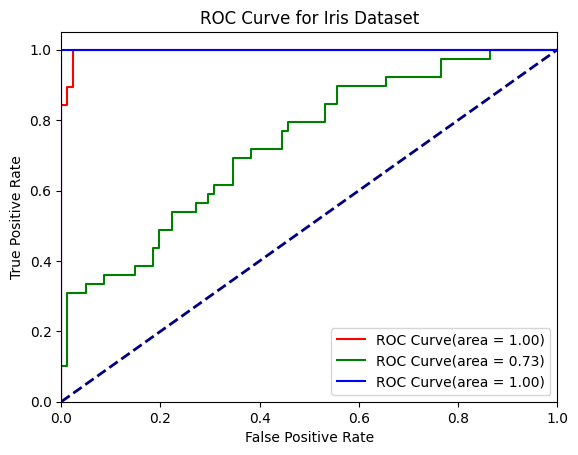

In [ ]:
#Binarize the dependent variable.
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Create training and test sets.
x_trg, x_test, y_trg, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

#Using one versus rest classifier for multiple classification.
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=42))
y_score = classifier.fit(x_trg, y_trg).decision_function(x_test)

#Creating dictionary for false positive, true positive, AUC.
fpr = dict()
tpr = dict()
roc_auc = dict()

#Execute ROC curve and compute ROC area for each class.
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Plot ROC curve for all the classes.
plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot(fpr[2], tpr[2], color='red', label='ROC Curve(area = %0.2f)'%roc_auc[2])
plt.plot(fpr[1], tpr[1], color='green', label='ROC Curve(area = %0.2f)'%roc_auc[1])
plt.plot(fpr[0], tpr[0], color='blue', label='ROC Curve(area = %0.2f)'%roc_auc[0])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Iris Dataset')
plt.legend(loc="lower right")
plt.show()

**Bagging for Classification Problems**

   ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default payment next month
0   1      20000    2  ...         0         0                           1
1   2     120000    2  ...         0      2000                           1
2   3      90000    2  ...      1000      5000                           0
3   4      50000    2  ...      1069      1000                           0
4   5      50000    1  ...       689       679                           0

[5 rows x 25 columns]
Dimensions of the dataset is (30000, 25)
Names of the variables in dataset are:
 Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
Types of the variables in dataset are:
 ID                            int64
LIMIT_BAL           

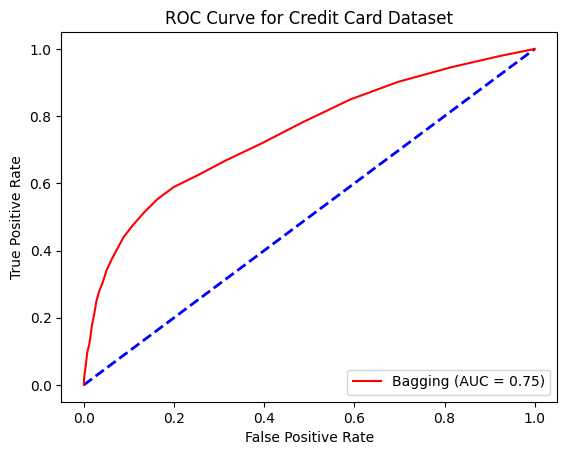

In [ ]:
#Import necessary libraries.
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt



# Path to your file in Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/Dataset/default of credit card clients.xls'

# Load the dataset
creditcard = pd.read_excel(file_path, header=1)

# Show first rows
print(creditcard.head())

#Displaying the characteristics of the credit card dataset.
print("Dimensions of the dataset is", creditcard.shape)
print("Names of the variables in dataset are:\n", creditcard.columns)
print("Types of the variables in dataset are:\n", creditcard.dtypes)

#Using random seed function for generating the same dataset.
np.random.seed(3000)
training, test = train_test_split(creditcard, test_size=0.3)
x_trg = training.drop(['default payment next month'], axis=1)
y_trg = training['default payment next month']
x_test = test.drop(['default payment next month'], axis=1)
y_test = test['default payment next month']

#Creating a bagging model.
print("------------------------------------BAGGING MODEL-----------------------")
credit_bag = BaggingClassifier(estimator = None, n_estimators=10, max_samples = 1.0, max_features=1.0, bootstrap=True)
credit_bag.fit(x_trg, y_trg)
y_pred = credit_bag.predict(x_test)
print("Accuracy of bagging model on training set: ", accuracy_score(y_trg, credit_bag.predict(x_trg)))
print("Accuracy of bagging model on test set: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


#Determining accuracy of the created model through confusion matrix.
credit_bag_acc_score = accuracy_score(y_test, y_pred)
print("Accuracy of bagging model is: ", credit_bag_acc_score)
credit_bag_cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix of bagging model is: \n", credit_bag_cm)

#Creating a new bagging model with best parameters.
print("-------------------------------BAGGING MODEL WITH BEST PARAMETERS------------------")
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [10,20,30], 'max_samples': [0.5, 0.8, 1.0], 'max_features': [0.5, 0.7, 1.0]}
credit_bag_grid = GridSearchCV(BaggingClassifier(), param_grid, cv=5)
credit_bag_grid.fit(x_trg, y_trg)
y_pred_grid = credit_bag_grid.predict(x_test)
print("Best parameters for bagging model are: ", credit_bag_grid.best_params_)

#Creating the model with best scores.
credit_bag_grid = BaggingClassifier(estimator=None, n_estimators = credit_bag_grid.best_params_['n_estimators'], max_samples = credit_bag_grid.best_params_['max_samples'],
                                    max_features = credit_bag_grid.best_params_['max_features'])

#Evaluating the model considering best parameters.
credit_bag_grid.fit(x_trg, y_trg)
y_pred_grid = credit_bag_grid.predict(x_test)
print("Accuracy of bagging model on training set: ", accuracy_score(y_trg, credit_bag_grid.predict(x_trg)))
print("Accuracy of bagging model on test set: ", accuracy_score(y_test, y_pred_grid))

#Predicting the new model.
credit_bag_pred2 = credit_bag_grid.predict(x_test)


#Determining accuracy of the new model through confusion matrix.
credit_bag_acc_score2 = accuracy_score(y_test, credit_bag_pred2)
print("Classification Report: \n", classification_report(y_test, credit_bag_pred2))
print("Accuracy of bagging model is: ", credit_bag_acc_score2)
credit_bag_cm2 = confusion_matrix(y_test, credit_bag_pred2)
print("Confusion matrix of bagging model is: \n", credit_bag_cm2)

#Predicting Probabilities.
bag_probs = credit_bag_grid.predict_proba(x_test)

#Considering probabilities for the positive outcome only.
bag_probs = bag_probs[:,1]

#Calculate ROC scores from original data and predicted probabilities.
bag_auc = roc_auc_score(y_test, bag_probs)

#Calculate ROC curves.
bag_fpr, bag_tpr, _ = roc_curve(y_test, bag_probs)

#Plot the straight line for the model.
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

#Plot the ROC curve for the model.
plt.plot(bag_fpr, bag_tpr, color="red", label=f'Bagging (AUC = {bag_auc:.2f})')

#Defining the axis labels.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Credit Card Dataset')
plt.legend(loc='lower right')

#Display the plot.
plt.show()

**Bagging Algorithm for Regression Problems**

In [ ]:
#Importing necessary libraries.
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
import numpy as np
import pandas as pd

#Loading dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
cars = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')
print(cars.head())

#Displaying the characteristics of the car dataset.
print("Dimension of the dataset: ", cars.shape)
print("Names of the variables in dataset are:\n", cars.columns)

# Using a random seed function for generating the same dataset.
np.random.seed(3000)
training, test = train_test_split(cars, test_size=0.3)

# Remove the 'car name' column from the features
x_trg = training.drop(['mpg', 'car name'], axis=1)
y_trg = training['mpg']
x_test = test.drop(['mpg', 'car name'], axis=1)
y_test = test['mpg']


#Creating a bagging model.
print("------------------------------------BAGGING MODEL-----------------------")
cars_bag = BaggingRegressor(n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True)
cars_bag.fit(x_trg, y_trg)
pred_grad = cars_bag.predict(x_test)

#Displaying the accuracy og the bagging model.
print("Accuracy of bagging model on training set: ", cars_bag.score(x_trg, y_trg))
print("Accuracy of bagging model on test set: ", cars_bag.score(x_test, y_test))

#Calculate RMSE for the model.
rmse = sqrt(mean_squared_error(y_test, pred_grad))
print("RMSE of bagging model is: ", rmse)

#Creating a new bagging model with best parameters.
print("-------------------------------BAGGING MODEL WITH BEST PARAMETERS------------------")
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [10,20,30], 'max_samples': [0.5, 0.8, 1.0], 'max_features': [0.5, 0.7, 1.0]}
cars_bag_grid = GridSearchCV(BaggingRegressor(), param_grid, cv=5)
cars_bag_grid.fit(x_trg, y_trg)
pred_grad_grid = cars_bag_grid.predict(x_test)
print("Best parameters for bagging model are: ", cars_bag_grid.best_params_)

#Creating the model with best scores.
car_bag_best=BaggingRegressor(n_estimators=cars_bag_grid.best_params_['n_estimators'], max_samples=cars_bag_grid.best_params_['max_samples'],
                              max_features=cars_bag_grid.best_params_['max_features'])

#Evaluating the model considering best parameters.
car_bag_best.fit(x_trg, y_trg)
pred_grad_grid = car_bag_best.predict(x_test)
print("Accuracy of bagging model on training set: ", car_bag_best.score(x_trg, y_trg))
print("Accuracy of bagging model on test set: ", car_bag_best.score(x_test, y_test))

#Make prediction on test set.
pred_grad_grid = car_bag_best.predict(x_test)

#Calculate RMSE for the model.
rmse_grad2 = sqrt(mean_squared_error(y_test, pred_grad_grid))
print("RMSE of bagging model is: ", rmse_grad2)

/tmp/ipython-input-1430593095.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  cars = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')


    mpg  cylinders  displacement  ...  model year  origin                   car name
0  18.0          8         307.0  ...          70       1  chevrolet chevelle malibu
1  15.0          8         350.0  ...          70       1          buick skylark 320
2  18.0          8         318.0  ...          70       1         plymouth satellite
3  16.0          8         304.0  ...          70       1              amc rebel sst
4  17.0          8         302.0  ...          70       1                ford torino

[5 rows x 9 columns]
Dimension of the dataset:  (398, 9)
Names of the variables in dataset are:
 Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')
------------------------------------BAGGING MODEL-----------------------
Accuracy of bagging model on training set:  0.9678616583235817
Accuracy of bagging model on test set:  0.8647281765818609
RMSE of bagging model is:  2.6168925592516534
--

**Random Forest Algorithm for Classification Problems**

In [ ]:
#Importing necessary libraries.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import urllib.request

#Loading and reading the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data'
file_path = '/content/letter-recognition.data'
urllib.request.urlretrieve(url, file_path)
print(f"Dataset downloaded to {file_path}")
column_names = ['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar',
                'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
letterdata = pd.read_csv(file_path, names=column_names)
print(letterdata.head())

#Displaying the characteriestics of the letter_scale dataset.
print("Dimension of the dataset:", letterdata.shape)
print("Name of the variables in the dataset are:\n", letterdata.columns)

#Using a random seed function for generating the same dataset.
np.random.seed(3000)
training, test = train_test_split(letterdata, test_size=0.3)
x_trg = training.drop(['lettr'], axis=1)
y_trg = training['lettr']
x_test = test.drop(['lettr'], axis=1)
y_test = test['lettr']

#Creating a random forest model.
print("------------------------------------RANDOM FOREST MODEL-----------------------")
letter_forest = RandomForestClassifier(n_estimators=100, random_state=42)
letter_forest.fit(x_trg, y_trg)
forest_pred = letter_forest.predict(x_test)
print("Accuracy of random forest model on training set: ", accuracy_score(y_trg, letter_forest.predict(x_trg)))
print("Accuracy of random forest model on test set: ", accuracy_score(y_test, forest_pred))
print(classification_report(y_test, forest_pred))

#Creating a new random forest model with grid search.
print("-------------------------------RANDOM FOREST MODEL WITH BEST PARAMETERS------------------")
from sklearn.model_selection import GridSearchCV
x = RandomForestClassifier()
param_grid = {'max_features': ["sqrt", "log2"], 'criterion' : ["gini", "entropy"]}
letter_forest_grid = GridSearchCV(x, param_grid, cv=5)
letter_forest_grid.fit(x_trg, y_trg)
print("Best Parameters:\n", letter_forest_grid.best_params_)

#Creating the model with best scores.
letter_forest_grid = RandomForestClassifier(n_estimators=100, max_features=letter_forest_grid.best_params_['max_features'],
                                            criterion=letter_forest_grid.best_params_['criterion'])

#Evaluating the model considering best parameters.
letter_forest_grid.fit(x_trg, y_trg)
y_pred_grid = letter_forest_grid.predict(x_test)
print("Accuracy of random forest model on training set: ", accuracy_score(y_trg, letter_forest_grid.predict(x_trg)))
print("Accuracy of random forest model on test set: ", accuracy_score(y_test, y_pred_grid))

#Predicting the new model.
letter_forest_pred2 = letter_forest_grid.predict(x_test)

#Determining accuracy of the new model through confusion matrix.
letter_forest_acc_score2 = accuracy_score(y_test, letter_forest_pred2)
print("Classification Report: \n", classification_report(y_test, letter_forest_pred2))
print("Accuracy of random forest model is: ", letter_forest_acc_score2)
forest_cm2 = confusion_matrix(y_test, letter_forest_pred2)

#Creating a bagging model.
print("------------------------------------BAGGING MODEL-----------------------")
credit_bag = BaggingClassifier(estimator = None, n_estimators=10, max_samples = 1.0, max_features=1.0, bootstrap=True)
credit_bag.fit(x_trg, y_trg)
y_pred = credit_bag.predict(x_test)
print("Accuracy of bagging model on training set: ", accuracy_score(y_trg, credit_bag.predict(x_trg)))
print("Accuracy of bagging model on test set: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Creating a decision tree model.
print("------------------------------------DECISION TREE MODEL-----------------------")
letter_tree = DecisionTreeClassifier(random_state=42)
letter_tree.fit(x_trg, y_trg)
tree_pred = letter_tree.predict(x_test)
print("Accuracy of decision tree model on training set:", letter_tree.score(x_trg, y_trg))
print("Accuracy of decision tree model on test set:", letter_tree.score(x_test, y_test))
print(classification_report(y_test, tree_pred))

Dataset downloaded to /content/letter-recognition.data
  lettr  x-box  y-box  width  high  ...  xy2br  x-ege  xegvy  y-ege  yegvx
0     T      2      8      3     5  ...      8      0      8      0      8
1     I      5     12      3     7  ...      9      2      8      4     10
2     D      4     11      6     8  ...      7      3      7      3      9
3     N      7     11      6     6  ...     10      6     10      2      8
4     G      2      1      3     1  ...      9      1      7      5     10

[5 rows x 17 columns]
Dimension of the dataset: (20000, 17)
Name of the variables in the dataset are:
 Index(['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar',
       'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege',
       'yegvx'],
      dtype='object')
------------------------------------RANDOM FOREST MODEL-----------------------
Accuracy of random forest model on training set:  1.0
Accuracy of random forest model on test set:  0.96083333333333

**Random Forest Algorithm for Regression Problems**

In [ ]:
#Imorting libraries.
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
import numpy as np
import pandas as pd
import urllib.request

#Loading and Reading Dataset.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
file_path = '/content/ENB2012_data.xlsx'
urllib.request.urlretrieve(url, file_path)
print(f"Dataset downloaded to {file_path}")
column_names = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height',
                'Orientation', 'Glazing Area', 'Glazing Area Distribution', 'Heating Load', 'Cooling Load']
energy_data = pd.read_excel(file_path, names=column_names)
print(energy_data.head())

#Displaying the characteristics of the energy dataset.
print("Dimension of the dataset:", energy_data.shape)
print("Name of the variables in the dataset are:\n", energy_data.columns)

#Using a random seed function for generating the same datset.
np.random.seed(3000)
training, test = train_test_split(energy_data, test_size=0.3)
x_trg = training.drop(['Heating Load', 'Cooling Load'], axis=1)
y_trg = training['Heating Load']
x_test = test.drop(['Heating Load', 'Cooling Load'], axis=1)
y_test = test['Heating Load']

#Creating a random forest model.
print("------------------------------------RANDOM FOREST MODEL-----------------------")
energy_forest = RandomForestRegressor(n_estimators=100, random_state=42)
energy_forest.fit(x_trg, y_trg)
forest_pred = energy_forest.predict(x_test)
print("Accuracy of random forest model on training set: ", energy_forest.score(x_trg, y_trg))
print("Accuracy of random forest model on test set: ", energy_forest.score(x_test, y_test))

#Calculate RMSE for the model.
rmse_forest = sqrt(mean_squared_error(y_test, forest_pred))
print("RMSE of random forest model is: ", rmse_forest)

#Creating a new random forest model with best parameters.
print("-------------------------------RANDOM FOREST MODEL WITH BEST PARAMETERS------------------")
from sklearn.model_selection import GridSearchCV
x = RandomForestRegressor()
param_grid = {'n_estimators': [10, 20, 30], 'max_features': ["sqrt", "log2"],'max_depth': [4,6,8],'criterion' : ["squared_error", "absolute_error"],
              'min_samples_split':[0.05, 0.10]}
energy_forest_grid = GridSearchCV(x, param_grid, cv=5)
energy_forest_grid.fit(x_trg, y_trg)
print("Best Parameters:\n", energy_forest_grid.best_params_)

#Creating the model considering best parameters.
energy_forest_grid = RandomForestRegressor(n_estimators=energy_forest_grid.best_params_['n_estimators'], max_depth=energy_forest_grid.best_params_['max_depth'],
                                            max_features=energy_forest_grid.best_params_['max_features'], criterion=energy_forest_grid.best_params_['criterion'],
                                            min_samples_split=energy_forest_grid.best_params_['min_samples_split'])

#Evaluating the model considering best parameters.
energy_forest_grid.fit(x_trg, y_trg)
y_pred_grid = energy_forest_grid.predict(x_test)
print("Accuracy of random forest model on training set: ", energy_forest_grid.score(x_trg, y_trg))
print("Accuracy of random forest model on test set: ", energy_forest_grid.score(x_test, y_pred_grid))

#Calculate RMSE for the new model.
rmse_forest2 = sqrt(mean_squared_error(y_test, y_pred_grid))
print("RMSE of random forest model is: ", rmse_forest2)

#Creating a Bagging Model.
print("------------------------------------BAGGING MODEL-----------------------")
energy_bag = BaggingRegressor(n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True)
energy_bag.fit(x_trg, y_trg)
bag_pred = energy_bag.predict(x_test)
print("Accuracy of bagging model on training set: ", energy_bag.score(x_trg, y_trg))
print("Accuracy of bagging model on test set: ", energy_bag.score(x_test, y_test))
rmse_grad = sqrt(mean_squared_error(y_test, bag_pred))
print("RMSE of bagging model is: ", rmse_grad)

#Creating a decision tree model
print("------------------------------------DECISION TREE MODEL-----------------------")
energy_tree = DecisionTreeRegressor(random_state=42)
energy_tree.fit(x_trg, y_trg)
tree_pred = energy_tree.predict(x_test)
print("Accuracy of decision tree model on training set:", energy_tree.score(x_trg, y_trg))
print("Accuracy of decision tree model on test set:", energy_tree.score(x_test, y_test))
rmse_tree = sqrt(mean_squared_error(y_test, tree_pred))
print("RMSE of decision tree model is: ", rmse_tree)

Dataset downloaded to /content/ENB2012_data.xlsx
   Relative Compactness  Surface Area  ...  Heating Load  Cooling Load
0                  0.98         514.5  ...         15.55         21.33
1                  0.98         514.5  ...         15.55         21.33
2                  0.98         514.5  ...         15.55         21.33
3                  0.98         514.5  ...         15.55         21.33
4                  0.90         563.5  ...         20.84         28.28

[5 rows x 10 columns]
Dimension of the dataset: (768, 10)
Name of the variables in the dataset are:
 Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')
------------------------------------RANDOM FOREST MODEL-----------------------
Accuracy of random forest model on training set:  0.9995234512869177
Accuracy of random forest model on test set:  0.9978165

**Extra Tree Algorithm for Classification Problems**

In [ ]:
# Importing libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import urllib.request
import pandas as pd
import numpy as np

# Loading and reading the dataset
train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.trn.Z'
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst'

train_compressed = '/content/shuttle.trn.Z'
train_decompressed = '/content/shuttle.trn'
test_file = '/content/shuttle.tst'

urllib.request.urlretrieve(train_url, train_compressed)
print(f"Train dataset downloaded to {train_compressed}")
urllib.request.urlretrieve(test_url, test_file)
print(f"Test dataset downloaded to {test_file}")

# Decompress train file using unix uncompress command
!uncompress -c /content/shuttle.trn.Z > /content/shuttle.trn
print(f"Train dataset decompressed to {train_decompressed}")

# Column names
column_names = ['Rad Flow', 'Fpv Close', 'Fpv Open', 'High', 'Bypass', 'Bpv Close', 'Bpv Open', 'class']

# Load datasets
train_data = pd.read_csv(train_decompressed, header=None, names=column_names, delim_whitespace=True)
print(f"Training data shape: {train_data.shape}")

test_data = pd.read_csv(test_file, header=None, names=column_names, delim_whitespace=True)
print(f"Test data shape: {test_data.shape}")

# Combine train and test
shuttle = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)
print(f"Full dataset shape (train + test): {shuttle.shape}")
print(shuttle.head())

# Dataset info
print("Dimension of the dataset:", shuttle.shape)
print("Name of the variables in the dataset are:\n", shuttle.columns)

# Set random seed
np.random.seed(3000)

# Split data
training, test = train_test_split(shuttle, test_size=0.3)
x_trg = training.drop(['class'], axis=1)
y_trg = training['class']
x_test = test.drop(['class'], axis=1)
y_test = test['class']

# EXTRA TREES MODEL
print("-------------------------------EXTRA TREES MODEL------------------")
shuttle_extratree = ExtraTreesClassifier(random_state=42)
shuttle_extratree.fit(x_trg, y_trg)
print("Accuracy on training set:", shuttle_extratree.score(x_trg, y_trg))
print("Accuracy on test set:", shuttle_extratree.score(x_test, y_test))
extratree_pred = shuttle_extratree.predict(x_test)
print("Classification Report:\n", classification_report(y_test, extratree_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, extratree_pred))

# EXTRA TREES MODEL WITH GRID SEARCH
print("-------------------------------EXTRA TREES MODEL WITH BEST PARAMETERS------------------")
param_grid = {
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [1, 2, 4],  # corrected values here
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(ExtraTreesClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_trg, y_trg)
print("Best Parameters:\n", grid_search.best_params_)

# Model with best parameters
shuttle_extratree_best = ExtraTreesClassifier(
    max_features=grid_search.best_params_['max_features'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    criterion=grid_search.best_params_['criterion'],
    random_state=42
)

shuttle_extratree_best.fit(x_trg, y_trg)
y_pred_grid = shuttle_extratree_best.predict(x_test)
print("Accuracy on training set:", shuttle_extratree_best.score(x_trg, y_trg))
print("Accuracy on test set:", shuttle_extratree_best.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, y_pred_grid))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_grid))

# RANDOM FOREST MODEL
print("------------------------------------RANDOM FOREST MODEL-----------------------")
shuttle_forest = RandomForestClassifier(random_state=42)
shuttle_forest.fit(x_trg, y_trg)
forest_pred = shuttle_forest.predict(x_test)
print("Accuracy on training set:", shuttle_forest.score(x_trg, y_trg))
print("Accuracy on test set:", shuttle_forest.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, forest_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, forest_pred))

# BAGGING MODEL
print("------------------------------------BAGGING MODEL-----------------------")
shuttle_bag = BaggingClassifier(n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, random_state=42)
shuttle_bag.fit(x_trg, y_trg)
bag_pred = shuttle_bag.predict(x_test)
print("Accuracy on training set:", shuttle_bag.score(x_trg, y_trg))
print("Accuracy on test set:", shuttle_bag.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, bag_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, bag_pred))

# DECISION TREE MODEL
print("------------------------------------DECISION TREE MODEL-----------------------")
shuttle_tree = DecisionTreeClassifier(random_state=42)
shuttle_tree.fit(x_trg, y_trg)
tree_pred = shuttle_tree.predict(x_test)
print("Accuracy on training set:", shuttle_tree.score(x_trg, y_trg))
print("Accuracy on test set:", shuttle_tree.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, tree_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, tree_pred))


Train dataset downloaded to /content/shuttle.trn.Z
Test dataset downloaded to /content/shuttle.tst
Train dataset decompressed to /content/shuttle.trn
Training data shape: (43500, 8)
Test data shape: (14500, 8)
Full dataset shape (train + test): (58000, 8)
   Rad Flow  Fpv Close  Fpv Open  High  Bypass  Bpv Close  Bpv Open  class
0        77          0        28     0      27         48        22      2
1        92          0         0    26      36         92        56      4
2        82          0        52    -5      29         30         2      1
3        76          0        28    18      40         48         8      1
4        79          0        34   -26      43         46         2      1
Dimension of the dataset: (58000, 8)
Name of the variables in the dataset are:
 Index(['Rad Flow', 'Fpv Close', 'Fpv Open', 'High', 'Bypass', 'Bpv Close',
       'Bpv Open', 'class'],
      dtype='object')
-------------------------------EXTRA TREES MODEL------------------


/tmp/ipython-input-1461699671.py:31: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_data = pd.read_csv(train_decompressed, header=None, names=column_names, delim_whitespace=True)
/tmp/ipython-input-1461699671.py:34: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_data = pd.read_csv(test_file, header=None, names=column_names, delim_whitespace=True)


Accuracy on training set: 0.9991379310344828
Accuracy on test set: 0.9980459770114942
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     13662
           2       0.93      0.81      0.87        16
           3       0.88      0.66      0.76        56
           4       1.00      1.00      1.00      2669
           5       1.00      1.00      1.00       994
           7       0.00      0.00      0.00         3

    accuracy                           1.00     17400
   macro avg       0.80      0.74      0.77     17400
weighted avg       1.00      1.00      1.00     17400

Confusion Matrix:
 [[13657     0     5     0     0     0]
 [    2    13     0     1     0     0]
 [   18     0    37     1     0     0]
 [    0     1     0  2668     0     0]
 [    3     0     0     0   991     0]
 [    3     0     0     0     0     0]]
-------------------------------EXTRA TREES MODEL WITH BEST PARAMETERS------------------


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Parameters:
 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1}
Accuracy on training set: 0.9167487684729064
Accuracy on test set: 0.9172988505747126
Classification Report:
               precision    recall  f1-score   support

           1       0.91      1.00      0.95     13662
           2       0.00      0.00      0.00        16
           3       1.00      0.02      0.04        56
           4       0.99      0.49      0.65      2669
           5       0.99      1.00      1.00       994
           7       0.00      0.00      0.00         3

    accuracy                           0.92     17400
   macro avg       0.65      0.42      0.44     17400
weighted avg       0.92      0.92      0.90     17400

Confusion Matrix:
 [[13662     0     0     0     0     0]
 [    6     0     0     8     2     0]
 [   45     0     1     7     3     0]
 [ 1362     0     0  1307     0     0]
 [    3     0     0     0   991     0]
 [    3     0     0     0  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy on training set: 0.9991379310344828
Accuracy on test set: 0.9983908045977011
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     13662
           2       1.00      0.88      0.93        16
           3       0.89      0.71      0.79        56
           4       1.00      1.00      1.00      2669
           5       1.00      1.00      1.00       994
           7       0.00      0.00      0.00         3

    accuracy                           1.00     17400
   macro avg       0.81      0.76      0.79     17400
weighted avg       1.00      1.00      1.00     17400

Confusion Matrix:
 [[13658     0     4     0     0     0]
 [    1    14     0     1     0     0]
 [   15     0    40     1     0     0]
 [    0     0     0  2669     0     0]
 [    3     0     0     0   991     0]
 [    2     0     1     0     0     0]]
------------------------------------BAGGING MODEL-----------------------


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy on training set: 0.999064039408867
Accuracy on test set: 0.9981034482758621
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     13662
           2       0.93      0.81      0.87        16
           3       0.90      0.62      0.74        56
           4       1.00      1.00      1.00      2669
           5       1.00      1.00      1.00       994
           7       0.50      0.33      0.40         3

    accuracy                           1.00     17400
   macro avg       0.89      0.80      0.83     17400
weighted avg       1.00      1.00      1.00     17400

Confusion Matrix:
 [[13656     0     4     0     1     1]
 [    3    13     0     0     0     0]
 [   20     0    35     1     0     0]
 [    0     1     0  2668     0     0]
 [    0     0     0     0   994     0]
 [    2     0     0     0     0     1]]
------------------------------------DECISION TREE MODEL-----------------------
Accuracy on tra

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Extra Tree Algorithm for Regression Problems**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from math import sqrt
import numpy as np
import pandas as pd

# Load and read dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls'
column_names = [
    'Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
    'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete Compressive Strength'
]

concrete = pd.read_excel(url, header=0, names=column_names)
print(concrete.head())

# Display dataset info
print("Dimension of the dataset:", concrete.shape)
print("Names of the variables:\n", concrete.columns)

# Split dataset
np.random.seed(3000)
training, test = train_test_split(concrete, test_size=0.3)
x_trg = training.drop(['Concrete Compressive Strength'], axis=1)
y_trg = training['Concrete Compressive Strength']
x_test = test.drop(['Concrete Compressive Strength'], axis=1)
y_test = test['Concrete Compressive Strength']

# Extra Trees model
print("--------------------------------EXTRA TREE MODEL-------------------------------")
concrete_extratree = ExtraTreesRegressor(random_state=42)
concrete_extratree.fit(x_trg, y_trg)
pred_grad = concrete_extratree.predict(x_test)
print("Training R²:", concrete_extratree.score(x_trg, y_trg))
print("Test R²:", concrete_extratree.score(x_test, y_test))
rmse_grad = sqrt(mean_squared_error(y_test, pred_grad))
print("RMSE:", rmse_grad)

# Grid Search for Extra Trees
print("-----------------------------EXTRA TREE MODEL WITH BEST PARAMETERS--------------------")
param_grid = {
    'max_features': ["sqrt", "log2"],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ["squared_error"]
}
concrete_extratree_grid = GridSearchCV(ExtraTreesRegressor(random_state=42), param_grid, cv=5)
concrete_extratree_grid.fit(x_trg, y_trg)
print("Best Parameters:\n", concrete_extratree_grid.best_params_)

# Train Extra Trees with best params
concrete_extratree_best = ExtraTreesRegressor(
    max_features=concrete_extratree_grid.best_params_['max_features'],
    min_samples_leaf=concrete_extratree_grid.best_params_['min_samples_leaf'],
    criterion=concrete_extratree_grid.best_params_['criterion'],
    random_state=42
)
concrete_extratree_best.fit(x_trg, y_trg)
pred_grad_grid = concrete_extratree_best.predict(x_test)
print("Training R²:", concrete_extratree_best.score(x_trg, y_trg))
print("Test R²:", concrete_extratree_best.score(x_test, y_test))
rmse_grad2 = sqrt(mean_squared_error(y_test, pred_grad_grid))
print("RMSE:", rmse_grad2)

# Random Forest model
print("------------------------------------RANDOM FOREST MODEL-----------------------")
concrete_forest = RandomForestRegressor(random_state=42)
concrete_forest.fit(x_trg, y_trg)
pred_forest = concrete_forest.predict(x_test)
print("Training R²:", concrete_forest.score(x_trg, y_trg))
print("Test R²:", concrete_forest.score(x_test, y_test))
rmse_forest = sqrt(mean_squared_error(y_test, pred_forest))
print("RMSE:", rmse_forest)

# Bagging model
print("------------------------------------BAGGING MODEL-----------------------")
concrete_bag = BaggingRegressor(
    n_estimators=10,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    random_state=42
)
concrete_bag.fit(x_trg, y_trg)
pred_bag = concrete_bag.predict(x_test)
print("Training R²:", concrete_bag.score(x_trg, y_trg))
print("Test R²:", concrete_bag.score(x_test, y_test))
rmse_bag = sqrt(mean_squared_error(y_test, pred_bag))
print("RMSE:", rmse_bag)

# Decision Tree model
print("------------------------------------DECISION TREE MODEL-----------------------")
concrete_tree = DecisionTreeRegressor(random_state=42)
concrete_tree.fit(x_trg, y_trg)
pred_tree = concrete_tree.predict(x_test)
print("Training R²:", concrete_tree.score(x_trg, y_trg))
print("Test R²:", concrete_tree.score(x_test, y_test))
rmse_tree = sqrt(mean_squared_error(y_test, pred_tree))
print("RMSE:", rmse_tree)


   Cement  Blast Furnace Slag  ...  Age  Concrete Compressive Strength
0   540.0                 0.0  ...   28                      79.986111
1   540.0                 0.0  ...   28                      61.887366
2   332.5               142.5  ...  270                      40.269535
3   332.5               142.5  ...  365                      41.052780
4   198.6               132.4  ...  360                      44.296075

[5 rows x 9 columns]
Dimension of the dataset: (1030, 9)
Names of the variables:
 Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete Compressive Strength'],
      dtype='object')
--------------------------------EXTRA TREE MODEL-------------------------------
Training R²: 0.9961974557684935
Test R²: 0.9121473908932223
RMSE: 5.034179896499395
-----------------------------EXTRA TREE MODEL WITH BEST PARAMETERS--------------------
Best Parameters:
 {'criterion': 'squared_error

**AdaBoost for Classification Problems**

  Class Name  Left-Weight  Left-Distance  Right-Weight  Right-Distance
0          B            1              1             1               1
1          R            1              1             1               2
2          R            1              1             1               3
3          R            1              1             1               4
4          R            1              1             1               5
Dataset Dimensions: (625, 5)
Feature Names:
 Index(['Class Name', 'Left-Weight', 'Left-Distance', 'Right-Weight',
       'Right-Distance'],
      dtype='object')

------------------------ ADA BOOST MODEL ------------------------
Training Accuracy: 0.9405034324942791
Test Accuracy: 0.8829787234042553
Classification Report:
               precision    recall  f1-score   support

           B       0.00      0.00      0.00        15
           L       0.87      0.98      0.92        84
           R       0.94      0.94      0.94        89

    accuracy                   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Accuracy: 1.0
Test Accuracy: 0.8404255319148937
Classification Report:
               precision    recall  f1-score   support

           B       0.00      0.00      0.00        15
           L       0.85      0.96      0.91        84
           R       0.93      0.87      0.90        89

    accuracy                           0.84       188
   macro avg       0.59      0.61      0.60       188
weighted avg       0.82      0.84      0.83       188

Confusion Matrix:
 [[81  3  0]
 [ 9  0  6]
 [ 5  7 77]]

------------------------ RANDOM FOREST MODEL ------------------------
Training Accuracy: 1.0
Test Accuracy: 0.8404255319148937
Classification Report:
               precision    recall  f1-score   support

           B       0.00      0.00      0.00        15
           L       0.86      0.95      0.90        84
           R       0.91      0.88      0.89        89

    accuracy                           0.84       188
   macro avg       0.59      0.61      0.60       188
weig

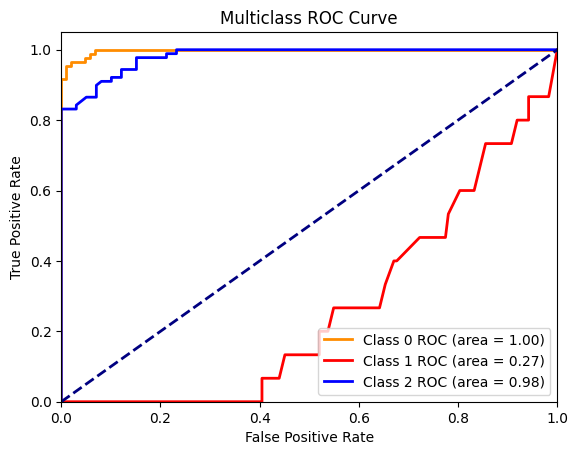

In [3]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Loading dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data'
column_names = ['Class Name', 'Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance']
balance = pd.read_csv(url, header=None, names=column_names)
print(balance.head())

# Dataset characteristics
print("Dataset Dimensions:", balance.shape)
print("Feature Names:\n", balance.columns)

# Train-test split
training, test = train_test_split(balance, test_size=0.3, random_state=3000)
x_trg = training.drop(['Class Name'], axis=1)
y_trg = training['Class Name']
x_test = test.drop(['Class Name'], axis=1)
y_test = test['Class Name']

# ------------------------ ADA BOOST MODEL ------------------------
print("\n------------------------ ADA BOOST MODEL ------------------------")
balance_ada = AdaBoostClassifier(random_state=42)
balance_ada.fit(x_trg, y_trg)
ada_pred = balance_ada.predict(x_test)

print("Training Accuracy:", balance_ada.score(x_trg, y_trg))
print("Test Accuracy:", balance_ada.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, ada_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, ada_pred, labels=['L','B','R']))

# ------------------- ADA BOOST WITH GRID SEARCH -------------------
print("\n------------------- ADA BOOST MODEL WITH GRID SEARCH -------------------")
param_grid = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [50, 100, 200]
}
balance_ada_grid = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, cv=5)
balance_ada_grid.fit(x_trg, y_trg)
print("Best Parameters:\n", balance_ada_grid.best_params_)

# Creating model with best parameters
balance_ada_best = AdaBoostClassifier(
    learning_rate=balance_ada_grid.best_params_['learning_rate'],
    n_estimators=balance_ada_grid.best_params_['n_estimators'],
    random_state=42
)

balance_ada_best.fit(x_trg, y_trg)
ada_best_pred = balance_ada_best.predict(x_test)
print("Training Accuracy:", balance_ada_best.score(x_trg, y_trg))
print("Test Accuracy:", balance_ada_best.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, ada_best_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, ada_best_pred, labels=['L','B','R']))

# ------------------------ EXTRA TREES MODEL ------------------------
print("\n------------------------ EXTRA TREES MODEL ------------------------")
balance_extratree = ExtraTreesClassifier(random_state=42)
balance_extratree.fit(x_trg, y_trg)
extratree_pred = balance_extratree.predict(x_test)
print("Training Accuracy:", balance_extratree.score(x_trg, y_trg))
print("Test Accuracy:", balance_extratree.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, extratree_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, extratree_pred, labels=['L','B','R']))

# ------------------------ RANDOM FOREST MODEL ------------------------
print("\n------------------------ RANDOM FOREST MODEL ------------------------")
balance_forest = RandomForestClassifier(random_state=42)
balance_forest.fit(x_trg, y_trg)
forest_pred = balance_forest.predict(x_test)
print("Training Accuracy:", balance_forest.score(x_trg, y_trg))
print("Test Accuracy:", balance_forest.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, forest_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, forest_pred, labels=['L','B','R']))

# ------------------------ BAGGING MODEL ------------------------
print("\n------------------------ BAGGING MODEL ------------------------")
balance_bag = BaggingClassifier(estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0,
                                bootstrap=True, random_state=42)
balance_bag.fit(x_trg, y_trg)
bag_pred = balance_bag.predict(x_test)
print("Training Accuracy:", balance_bag.score(x_trg, y_trg))
print("Test Accuracy:", balance_bag.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, bag_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, bag_pred, labels=['L','B','R']))

# ------------------------ DECISION TREE MODEL ------------------------
print("\n------------------------ DECISION TREE MODEL ------------------------")
balance_tree = DecisionTreeClassifier(random_state=42)
balance_tree.fit(x_trg, y_trg)
tree_pred = balance_tree.predict(x_test)
print("Training Accuracy:", balance_tree.score(x_trg, y_trg))
print("Test Accuracy:", balance_tree.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, tree_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, tree_pred, labels=['L','B','R']))

# ------------------------ MULTICLASS ROC CURVE ------------------------
print("\n------------------------ MULTICLASS ROC CURVE ------------------------")
y_trg_bin = label_binarize(training['Class Name'], classes=['L', 'B', 'R'])
y_test_bin = label_binarize(test['Class Name'], classes=['L', 'B', 'R'])

classifier = OneVsRestClassifier(
    AdaBoostClassifier(
        learning_rate=balance_ada_grid.best_params_['learning_rate'],
        n_estimators=balance_ada_grid.best_params_['n_estimators'],
        random_state=42
    )
)
y_score = classifier.fit(x_trg, y_trg_bin).decision_function(x_test)

# Compute ROC curve and AUC
fpr, tpr, roc_auc = {}, {}, {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC
plt.figure()
colors = ['darkorange', 'red', 'blue']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} ROC (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()


**AdaBoost for Regression Problems**

In [7]:
# Importing necessary libraries
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from math import sqrt
import numpy as np
import pandas as pd

# Loading dataset
column_names = [
    "Sex", "Length", "Diameter", "Height",
    "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"
]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
abalone = pd.read_csv(url, header=None, names=column_names)

# Display dataset information
print(abalone.head())
print("\nDataset shape:", abalone.shape)
print("\nColumns:", abalone.columns)
print("\nData types:\n", abalone.dtypes)
print("\nMissing values?\n", abalone.isnull().sum())
print("\nBasic statistics:\n", abalone.describe())

# Encode categorical variable 'Sex' using one-hot encoding
abalone = pd.get_dummies(abalone, columns=['Sex'], drop_first=True)

# Split data into train and test sets
training, test = train_test_split(abalone, test_size=0.3, random_state=3000)
x_trg = training.drop(['Rings'], axis=1)
y_trg = training['Rings']
x_test = test.drop(['Rings'], axis=1)
y_test = test['Rings']

# ------------------------ ADA BOOST MODEL ------------------------
print("\n------------------------ ADA BOOST MODEL ------------------------")
abalone_ada = AdaBoostRegressor(random_state=42)
abalone_ada.fit(x_trg, y_trg)
pred_ada = abalone_ada.predict(x_test)
print("Training R²:", abalone_ada.score(x_trg, y_trg))
print("Test R²:", abalone_ada.score(x_test, y_test))
rmse_ada = sqrt(mean_squared_error(y_test, pred_ada))
print("RMSE:", rmse_ada)

# ------------------------ ADA BOOST WITH GRID SEARCH ------------------------
print("\n----------------- ADA BOOST MODEL WITH BEST PARAMETERS -----------------")
param_grid = {'learning_rate': [0.05, 0.7, 0.9, 1], 'n_estimators': [50, 100, 200]}
abalone_ada_grid = GridSearchCV(AdaBoostRegressor(random_state=42), param_grid, cv=5)
abalone_ada_grid.fit(x_trg, y_trg)
print("Best Parameters:\n", abalone_ada_grid.best_params_)

# Train with best parameters
abalone_ada_best = AdaBoostRegressor(
    learning_rate=abalone_ada_grid.best_params_['learning_rate'],
    n_estimators=abalone_ada_grid.best_params_['n_estimators'],
    random_state=42
)
abalone_ada_best.fit(x_trg, y_trg)
pred_ada_grid = abalone_ada_best.predict(x_test)
print("Training R²:", abalone_ada_best.score(x_trg, y_trg))
print("Test R²:", abalone_ada_best.score(x_test, y_test))
rmse_ada2 = sqrt(mean_squared_error(y_test, pred_ada_grid))
print("RMSE:", rmse_ada2)

# ------------------------ EXTRA TREES MODEL ------------------------
print("\n------------------------ EXTRA TREES MODEL ------------------------")
abalone_extratree = ExtraTreesRegressor(random_state=42)
abalone_extratree.fit(x_trg, y_trg)
pred_extratree = abalone_extratree.predict(x_test)
print("Training R²:", abalone_extratree.score(x_trg, y_trg))
print("Test R²:", abalone_extratree.score(x_test, y_test))
rmse_extratree = sqrt(mean_squared_error(y_test, pred_extratree))
print("RMSE:", rmse_extratree)

# ------------------------ RANDOM FOREST MODEL ------------------------
print("\n------------------------ RANDOM FOREST MODEL ------------------------")
abalone_forest = RandomForestRegressor(random_state=42)
abalone_forest.fit(x_trg, y_trg)
pred_forest = abalone_forest.predict(x_test)
print("Training R²:", abalone_forest.score(x_trg, y_trg))
print("Test R²:", abalone_forest.score(x_test, y_test))
rmse_forest = sqrt(mean_squared_error(y_test, pred_forest))
print("RMSE:", rmse_forest)

# ------------------------ BAGGING MODEL ------------------------
print("\n------------------------ BAGGING MODEL ------------------------")
abalone_bag = BaggingRegressor(
    n_estimators=10, max_samples=1.0, max_features=1.0,
    bootstrap=True, random_state=42
)
abalone_bag.fit(x_trg, y_trg)
pred_bag = abalone_bag.predict(x_test)
print("Training R²:", abalone_bag.score(x_trg, y_trg))
print("Test R²:", abalone_bag.score(x_test, y_test))
rmse_bag = sqrt(mean_squared_error(y_test, pred_bag))
print("RMSE:", rmse_bag)

# ------------------------ DECISION TREE MODEL ------------------------
print("\n------------------------ DECISION TREE MODEL ------------------------")
abalone_tree = DecisionTreeRegressor(random_state=42)
abalone_tree.fit(x_trg, y_trg)
pred_tree = abalone_tree.predict(x_test)
print("Training R²:", abalone_tree.score(x_trg, y_trg))
print("Test R²:", abalone_tree.score(x_test, y_test))
rmse_tree = sqrt(mean_squared_error(y_test, pred_tree))
print("RMSE:", rmse_tree)


  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  

Dataset shape: (4177, 9)

Columns: Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Data types:
 Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Visc

**Gradient Boosting for Classification Problems**

Red wine dataset:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Extra Trees
Training Accuracy: 1.0
Test Accuracy: 0.6708333333333333
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.73      0.78      0.75       195
           6       0.64      0.70      0.67       200
           7       0.60      0.48      0.53        61
           8       0.33      0.17      0.22         6

    accuracy                           0.67       480
   macro avg       0.38      0.35      0.36       480
weighted avg       0.64      0.67      0.65       480

Confusion Matrix:
 [[  0   0   1   0   0   0]
 [  0   0  10   7   0   0]
 [  0   0 152  40   3   0]
 [  0   1  45 140  13   1]
 [  0   0   0  31  29   1]
 [  0   0   0   2   3   1]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest
Training Accuracy: 1.0
Test Accuracy: 0.6583333333333333
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.73      0.78      0.75       195
           6       0.63      0.68      0.65       200
           7       0.53      0.44      0.48        61
           8       0.33      0.17      0.22         6

    accuracy                           0.66       480
   macro avg       0.37      0.34      0.35       480
weighted avg       0.63      0.66      0.64       480

Confusion Matrix:
 [[  0   0   1   0   0   0]
 [  0   0  10   7   0   0]
 [  0   0 152  41   2   0]
 [  0   0  46 136  17   1]
 [  0   0   0  33  27   1]
 [  0   0   0   0   5   1]]

Bagging
Training Accuracy: 0.9821268990169795
Test Accuracy: 0.6166666666666667
Classification Report:
               precision    recall  f1-score   support

           3       

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

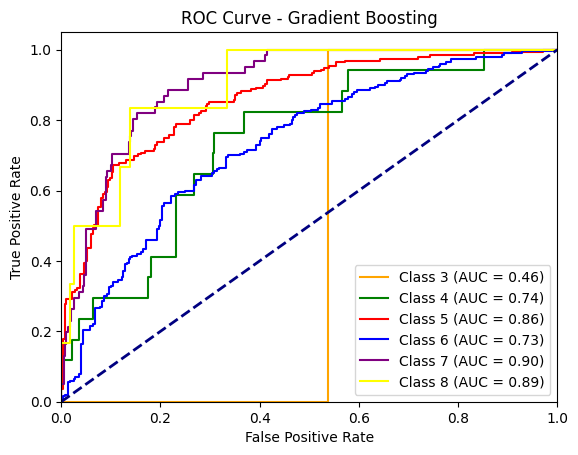

In [10]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import (
    GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier,
    RandomForestClassifier, BaggingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading and Reading the Dataset
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df_red = pd.read_csv(url_red, sep=';')
df_white = pd.read_csv(url_white, sep=';')

print("Red wine dataset:\n", df_red.head(), "\nShape:", df_red.shape, "\n")
print("White wine dataset:\n", df_white.head(), "\nShape:", df_white.shape, "\n")

# Check data info
print("Red wine nulls:\n", df_red.isnull().sum(), "\n")
print("White wine nulls:\n", df_white.isnull().sum(), "\n")

# Using a random seed for reproducibility
np.random.seed(3000)
training, test = train_test_split(df_red, test_size=0.3, random_state=42)
x_trg = training.drop(['quality'], axis=1)
y_trg = training['quality']
x_test = test.drop(['quality'], axis=1)
y_test = test['quality']

# ---------------------------- GRADIENT BOOSTING MODEL ---------------------------
wine_grad = GradientBoostingClassifier(random_state=42)
wine_grad.fit(x_trg, y_trg)
pred_grad = wine_grad.predict(x_test)
print("\nGradient Boosting - Basic")
print("Training Accuracy:", wine_grad.score(x_trg, y_trg))
print("Test Accuracy:", wine_grad.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, pred_grad))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_grad))

# ------------------- GRADIENT BOOSTING MODEL WITH GRID SEARCH -------------------
param_grid = {
    'max_features': ["sqrt"],
    'max_depth': [3, 4],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1]
}
wine_grad_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5)
wine_grad_grid.fit(x_trg, y_trg)
print("\nBest Parameters (Gradient Boosting):", wine_grad_grid.best_params_)

wine_grad_best = GradientBoostingClassifier(**wine_grad_grid.best_params_, random_state=42)
wine_grad_best.fit(x_trg, y_trg)
pred_grad_grid = wine_grad_best.predict(x_test)
print("Training Accuracy:", wine_grad_best.score(x_trg, y_trg))
print("Test Accuracy:", wine_grad_best.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, pred_grad_grid))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_grad_grid))

# ---------------------------- ADABOOST MODEL ---------------------------
wine_ada = AdaBoostClassifier(random_state=42)
wine_ada.fit(x_trg, y_trg)
pred_ada = wine_ada.predict(x_test)
print("\nAdaBoost")
print("Training Accuracy:", wine_ada.score(x_trg, y_trg))
print("Test Accuracy:", wine_ada.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_ada))

# ---------------------------- EXTRA TREES MODEL ---------------------------
wine_extratree = ExtraTreesClassifier(random_state=0)
wine_extratree.fit(x_trg, y_trg)
pred_extratree = wine_extratree.predict(x_test)
print("\nExtra Trees")
print("Training Accuracy:", wine_extratree.score(x_trg, y_trg))
print("Test Accuracy:", wine_extratree.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, pred_extratree))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_extratree))

# ---------------------- RANDOM FOREST MODEL -------------------------------
wine_forest = RandomForestClassifier(random_state=0)
wine_forest.fit(x_trg, y_trg)
pred_forest = wine_forest.predict(x_test)
print("\nRandom Forest")
print("Training Accuracy:", wine_forest.score(x_trg, y_trg))
print("Test Accuracy:", wine_forest.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, pred_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_forest))

# ---------------------------- BAGGING MODEL ---------------------------
wine_bag = BaggingClassifier(n_estimators=10, random_state=0)
wine_bag.fit(x_trg, y_trg)
pred_bag = wine_bag.predict(x_test)
print("\nBagging")
print("Training Accuracy:", wine_bag.score(x_trg, y_trg))
print("Test Accuracy:", wine_bag.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, pred_bag))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_bag))

# ---------------------------- DECISION TREE MODEL ---------------------------
wine_tree = DecisionTreeClassifier(random_state=0)
wine_tree.fit(x_trg, y_trg)
pred_tree = wine_tree.predict(x_test)
print("\nDecision Tree")
print("Training Accuracy:", wine_tree.score(x_trg, y_trg))
print("Test Accuracy:", wine_tree.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_tree))

# ---------------------------- ROC Curve for Gradient Boosting ---------------------------
# Binarize labels for ROC curve
classes = sorted(y_trg.unique())
y_trg_bin = label_binarize(y_trg, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

classifier = OneVsRestClassifier(wine_grad_best)
y_score = classifier.fit(x_trg, y_trg).decision_function(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i, color in zip(range(len(classes)), ['orange', 'green', 'red', 'blue', 'purple', 'yellow']):
    plt.plot(fpr[i], tpr[i], color=color, label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()


Combined dataset:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8 

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



Best Parameters (Gradient Boosting): {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
Training Accuracy: 0.8829997800747745
Test Accuracy: 0.6364102564102564
Classification Report:
               precision    recall  f1-score   support

           3       0.14      0.11      0.12         9
           4       0.39      0.13      0.20        69
           5       0.64      0.70      0.67       613
           6       0.64      0.70      0.67       894
           7       0.62      0.51      0.56       315
           8       0.73      0.33      0.45        49
           9       0.00      0.00      0.00         1

    accuracy                           0.64      1950
   macro avg       0.45      0.35      0.38      1950
weighted avg       0.63      0.64      0.63      1950

Confusion Matrix:
 [[  1   0   4   3   1   0   0]
 [  2   9  41  16   1   0   0]
 [  1   9 427 170   6   0   0]
 [  2   5 181 628  75   3   0]
 [  1   0  11 140 160   3   0]
 [  0   0  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



AdaBoost
Training Accuracy: 0.5124257752364196
Test Accuracy: 0.5005128205128205
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        69
           5       0.54      0.59      0.56       613
           6       0.50      0.64      0.56       894
           7       0.30      0.15      0.20       315
           8       0.00      0.00      0.00        49
           9       0.00      0.00      0.00         1

    accuracy                           0.50      1950
   macro avg       0.19      0.20      0.19      1950
weighted avg       0.45      0.50      0.47      1950

Confusion Matrix:
 [[  0   0   3   5   1   0   0]
 [  0   0  35  32   2   0   0]
 [  0   0 359 239  15   0   0]
 [  0   0 248 570  76   0   0]
 [  0   0  18 250  47   0   0]
 [  0   0   1  35  13   0   0]
 [  0   0   0   0   1   0   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Extra Trees
Training Accuracy: 1.0
Test Accuracy: 0.6687179487179488
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.59      0.19      0.29        69
           5       0.66      0.72      0.69       613
           6       0.67      0.74      0.70       894
           7       0.69      0.55      0.61       315
           8       0.84      0.33      0.47        49
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1950
   macro avg       0.49      0.36      0.39      1950
weighted avg       0.67      0.67      0.66      1950

Confusion Matrix:
 [[  0   0   6   3   0   0   0]
 [  2  13  40  14   0   0   0]
 [  0   6 440 158   9   0   0]
 [  0   3 173 661  55   2   0]
 [  0   0   4 136 174   1   0]
 [  0   0   0  18  15  16   0]
 [  0   0   0   1   0   0   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest
Training Accuracy: 1.0
Test Accuracy: 0.6676923076923077
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.82      0.13      0.23        69
           5       0.67      0.73      0.70       613
           6       0.66      0.74      0.70       894
           7       0.66      0.53      0.59       315
           8       0.88      0.31      0.45        49
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1950
   macro avg       0.53      0.35      0.38      1950
weighted avg       0.67      0.67      0.66      1950

Confusion Matrix:
 [[  0   0   4   5   0   0   0]
 [  1   9  42  17   0   0   0]
 [  0   1 450 155   7   0   0]
 [  0   1 169 662  61   1   0]
 [  0   0   2 146 166   1   0]
 [  0   0   0  18  16  15   0]
 [  0   0   0   1   0   0   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Bagging
Training Accuracy: 0.9817462062898614
Test Accuracy: 0.6466666666666666
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.41      0.16      0.23        69
           5       0.62      0.72      0.67       613
           6       0.67      0.70      0.68       894
           7       0.66      0.53      0.59       315
           8       0.77      0.35      0.48        49
           9       0.00      0.00      0.00         1

    accuracy                           0.65      1950
   macro avg       0.45      0.35      0.38      1950
weighted avg       0.64      0.65      0.64      1950

Confusion Matrix:
 [[  0   0   5   4   0   0   0]
 [  3  11  42  13   0   0   0]
 [  0   7 439 152  14   1   0]
 [  0   9 200 627  57   1   0]
 [  0   0  19 126 167   3   0]
 [  0   0   0  17  15  17   0]
 [  0   0   0   1   0   0   0]]

Decision Tree
Training Accuracy: 1.0
Test Accuracy: 0.58
Cla

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


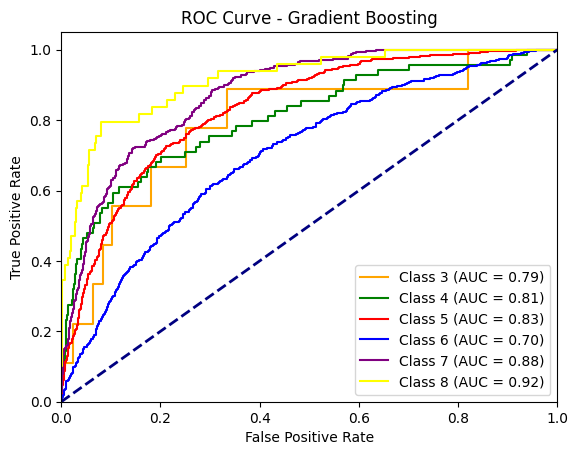

In [12]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import (
    GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier,
    RandomForestClassifier, BaggingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading and Reading the Dataset
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df_red = pd.read_csv(url_red, sep=';')
df_white = pd.read_csv(url_white, sep=';')

# Add type column to differentiate wine type
df_red['type'] = 'red'
df_white['type'] = 'white'

# Combine datasets
wine_df = pd.concat([df_red, df_white], ignore_index=True)

# Encode wine type (red=0, white=1)
le = LabelEncoder()
wine_df['type'] = le.fit_transform(wine_df['type'])

print("Combined dataset:\n", wine_df.head(), "\nShape:", wine_df.shape, "\n")
print("Null values:\n", wine_df.isnull().sum(), "\n")

# Using a random seed for reproducibility
np.random.seed(3000)
training, test = train_test_split(wine_df, test_size=0.3, random_state=42)
x_trg = training.drop(['quality'], axis=1)
y_trg = training['quality']
x_test = test.drop(['quality'], axis=1)
y_test = test['quality']

# ---------------------------- GRADIENT BOOSTING MODEL ---------------------------
wine_grad = GradientBoostingClassifier(random_state=42)
wine_grad.fit(x_trg, y_trg)
pred_grad = wine_grad.predict(x_test)
print("\nGradient Boosting - Basic")
print("Training Accuracy:", wine_grad.score(x_trg, y_trg))
print("Test Accuracy:", wine_grad.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, pred_grad))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_grad))

# ------------------- GRADIENT BOOSTING MODEL WITH GRID SEARCH -------------------
param_grid = {
    'max_features': ["sqrt"],
    'max_depth': [3, 4],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1]
}
wine_grad_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5)
wine_grad_grid.fit(x_trg, y_trg)
print("\nBest Parameters (Gradient Boosting):", wine_grad_grid.best_params_)

wine_grad_best = GradientBoostingClassifier(**wine_grad_grid.best_params_, random_state=42)
wine_grad_best.fit(x_trg, y_trg)
pred_grad_grid = wine_grad_best.predict(x_test)
print("Training Accuracy:", wine_grad_best.score(x_trg, y_trg))
print("Test Accuracy:", wine_grad_best.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, pred_grad_grid))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_grad_grid))

# ---------------------------- ADABOOST MODEL ---------------------------
wine_ada = AdaBoostClassifier(random_state=42)
wine_ada.fit(x_trg, y_trg)
pred_ada = wine_ada.predict(x_test)
print("\nAdaBoost")
print("Training Accuracy:", wine_ada.score(x_trg, y_trg))
print("Test Accuracy:", wine_ada.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_ada))

# ---------------------------- EXTRA TREES MODEL ---------------------------
wine_extratree = ExtraTreesClassifier(random_state=0)
wine_extratree.fit(x_trg, y_trg)
pred_extratree = wine_extratree.predict(x_test)
print("\nExtra Trees")
print("Training Accuracy:", wine_extratree.score(x_trg, y_trg))
print("Test Accuracy:", wine_extratree.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, pred_extratree))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_extratree))

# ---------------------- RANDOM FOREST MODEL -------------------------------
wine_forest = RandomForestClassifier(random_state=0)
wine_forest.fit(x_trg, y_trg)
pred_forest = wine_forest.predict(x_test)
print("\nRandom Forest")
print("Training Accuracy:", wine_forest.score(x_trg, y_trg))
print("Test Accuracy:", wine_forest.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, pred_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_forest))

# ---------------------------- BAGGING MODEL ---------------------------
wine_bag = BaggingClassifier(n_estimators=10, random_state=0)
wine_bag.fit(x_trg, y_trg)
pred_bag = wine_bag.predict(x_test)
print("\nBagging")
print("Training Accuracy:", wine_bag.score(x_trg, y_trg))
print("Test Accuracy:", wine_bag.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, pred_bag))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_bag))

# ---------------------------- DECISION TREE MODEL ---------------------------
wine_tree = DecisionTreeClassifier(random_state=0)
wine_tree.fit(x_trg, y_trg)
pred_tree = wine_tree.predict(x_test)
print("\nDecision Tree")
print("Training Accuracy:", wine_tree.score(x_trg, y_trg))
print("Test Accuracy:", wine_tree.score(x_test, y_test))
print("Classification Report:\n", classification_report(y_test, pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_tree))

# ---------------------------- ROC Curve for Gradient Boosting ---------------------------
classes = sorted(y_trg.unique())
y_trg_bin = label_binarize(y_trg, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

classifier = OneVsRestClassifier(wine_grad_best)
y_score = classifier.fit(x_trg, y_trg).decision_function(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i, color in zip(range(len(classes)), ['orange', 'green', 'red', 'blue', 'purple', 'yellow']):
    plt.plot(fpr[i], tpr[i], color=color, label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()


**Gradient Boosting for Regression Problems**

In [15]:
# Importing necessary libraries
from sklearn.ensemble import (
    GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor,
    RandomForestRegressor, BaggingRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import pandas as pd

# Loading and Reading Dataset
column_names = [
    "frequency",
    "angle_of_attack",
    "chord_length",
    "free_stream_velocity",
    "suction_side_displacement_thickness",
    "scaled_sound_pressure_level"
]

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"
airfoil = pd.read_csv(url, sep="\t", header=None, names=column_names)

print("First 5 rows:\n", airfoil.head(), "\n")
print("Dataset shape:", airfoil.shape)
print("\nColumns:", airfoil.columns)
print("\nData types:\n", airfoil.dtypes)
print("\nMissing values:\n", airfoil.isnull().sum())
print("\nBasic statistics:\n", airfoil.describe())

# Train-test split
np.random.seed(3000)
training, test = train_test_split(airfoil, test_size=0.3, random_state=42)
x_trg = training.drop(['scaled_sound_pressure_level'], axis=1)
y_trg = training['scaled_sound_pressure_level']
x_test = test.drop(['scaled_sound_pressure_level'], axis=1)
y_test = test['scaled_sound_pressure_level']

# ------------------ GRADIENT BOOSTING MODEL ------------------
print("\n----- GRADIENT BOOSTING MODEL -----")
airfoil_grad = GradientBoostingRegressor(random_state=42)
airfoil_grad.fit(x_trg, y_trg)
pred_grad = airfoil_grad.predict(x_test)
print("Training R²:", airfoil_grad.score(x_trg, y_trg))
print("Test R²:", airfoil_grad.score(x_test, y_test))
print("RMSE:", sqrt(mean_squared_error(y_test, pred_grad)))

# ------------------ GRADIENT BOOSTING WITH GRID SEARCH ------------------
print("\n----- GRADIENT BOOSTING WITH GRID SEARCH -----")
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2]
}
airfoil_grad_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    cv=5
)
airfoil_grad_grid.fit(x_trg, y_trg)
print("Best Parameters:", airfoil_grad_grid.best_params_)

airfoil_grad_best = GradientBoostingRegressor(
    max_depth=airfoil_grad_grid.best_params_['max_depth'],
    n_estimators=airfoil_grad_grid.best_params_['n_estimators'],
    learning_rate=airfoil_grad_grid.best_params_['learning_rate'],
    random_state=42
)
airfoil_grad_best.fit(x_trg, y_trg)
pred_grad_grid = airfoil_grad_best.predict(x_test)
print("Training R²:", airfoil_grad_best.score(x_trg, y_trg))
print("Test R²:", airfoil_grad_best.score(x_test, y_test))
print("RMSE:", sqrt(mean_squared_error(y_test, pred_grad_grid)))

# ------------------ ADABOOST ------------------
print("\n----- ADABOOST -----")
airfoil_ada = AdaBoostRegressor(random_state=42)
airfoil_ada.fit(x_trg, y_trg)
pred_ada = airfoil_ada.predict(x_test)
print("Training R²:", airfoil_ada.score(x_trg, y_trg))
print("Test R²:", airfoil_ada.score(x_test, y_test))
print("RMSE:", sqrt(mean_squared_error(y_test, pred_ada)))

# ------------------ EXTRA TREES ------------------
print("\n----- EXTRA TREES -----")
airfoil_extratree = ExtraTreesRegressor(random_state=0)
airfoil_extratree.fit(x_trg, y_trg)
pred_extratree = airfoil_extratree.predict(x_test)
print("Training R²:", airfoil_extratree.score(x_trg, y_trg))
print("Test R²:", airfoil_extratree.score(x_test, y_test))
print("RMSE:", sqrt(mean_squared_error(y_test, pred_extratree)))

# ------------------ RANDOM FOREST ------------------
print("\n----- RANDOM FOREST -----")
airfoil_forest = RandomForestRegressor(random_state=0)
airfoil_forest.fit(x_trg, y_trg)
pred_forest = airfoil_forest.predict(x_test)
print("Training R²:", airfoil_forest.score(x_trg, y_trg))
print("Test R²:", airfoil_forest.score(x_test, y_test))
print("RMSE:", sqrt(mean_squared_error(y_test, pred_forest)))

# ------------------ BAGGING ------------------
print("\n----- BAGGING -----")
airfoil_bag = BaggingRegressor(n_estimators=10, random_state=0)
airfoil_bag.fit(x_trg, y_trg)
pred_bag = airfoil_bag.predict(x_test)
print("Training R²:", airfoil_bag.score(x_trg, y_trg))
print("Test R²:", airfoil_bag.score(x_test, y_test))
print("RMSE:", sqrt(mean_squared_error(y_test, pred_bag)))

# ------------------ DECISION TREE ------------------
print("\n----- DECISION TREE -----")
airfoil_tree = DecisionTreeRegressor(random_state=0)
airfoil_tree.fit(x_trg, y_trg)
pred_tree = airfoil_tree.predict(x_test)
print("Training R²:", airfoil_tree.score(x_trg, y_trg))
print("Test R²:", airfoil_tree.score(x_test, y_test))
print("RMSE:", sqrt(mean_squared_error(y_test, pred_tree)))


First 5 rows:
    frequency  angle_of_attack  chord_length  free_stream_velocity  \
0        800              0.0        0.3048                  71.3   
1       1000              0.0        0.3048                  71.3   
2       1250              0.0        0.3048                  71.3   
3       1600              0.0        0.3048                  71.3   
4       2000              0.0        0.3048                  71.3   

   suction_side_displacement_thickness  scaled_sound_pressure_level  
0                             0.002663                      126.201  
1                             0.002663                      125.201  
2                             0.002663                      125.951  
3                             0.002663                      127.591  
4                             0.002663                      127.461   

Dataset shape: (1503, 6)

Columns: Index(['frequency', 'angle_of_attack', 'chord_length', 'free_stream_velocity',
       'suction_side_displacement_